### Test inputs

In [8]:

inputs = [
    [7, 1],
    [11, 1],
    [11, 7],
    [9, 7],
    [9, 5],
    [2, 5],
    [2, 3],
    [7, 3],
]

inputs = [
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 2],
    [1, 2],
    [1, 3],
    [2, 3],
    [2, 2],
    [3, 2],
    [3, 1],
    [2, 1],
    [2, 0],
]
# # # 
# inputs = [
#     [0, 0],
#     [0, 4],
#     [1, 4],
#     [1, 1],
#     [2, 1],
#     [2, 0],
#     [1, 0],
# ]

## Task 1

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


areas = []
print(inputs)

# Compute distances between all nodes
for i, val1 in enumerate(inputs):
    for j, val2 in enumerate(inputs):
        if j < i:
            areas += [(abs(val1[0] - val2[0]) + 1) * (abs(val1[1] - val2[1]) + 1)]

max(areas)

[[1, 0], [1, 1], [0, 1], [0, 2], [1, 2], [1, 3], [2, 3], [2, 2], [3, 2], [3, 1], [2, 1], [2, 0]]


9

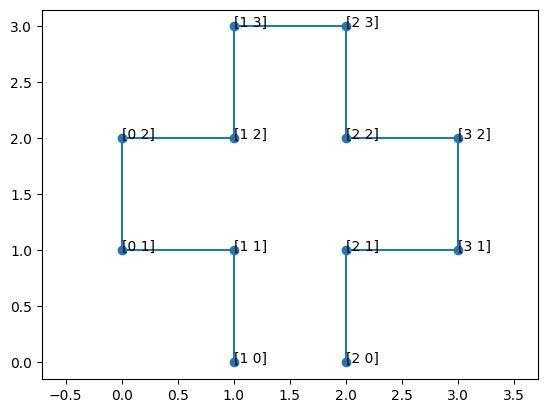

In [10]:
coords = np.array(inputs)
x = coords[:, 0]
y = coords[:, 1]

fig, ax = plt.subplots()
ax.plot(x, y, "-o")

for i, txt in enumerate(coords):
    ax.annotate(txt, (x[i], y[i]))
# ax.yaxis.set_inverted(True)
ax.axis("equal")
plt.show()


## Task 2

In [11]:
def cross2d(v1,v2):
    return v1[0]*v2[1] - v1[1]*v2[0]

# Check if we need to turn points around.  
# Current solution works only for clockwise traversal 
inputs = np.array(inputs)
min_x_id = np.argmin(inputs[:,0])
cur_point = inputs[min_x_id]
next_point = inputs[min_x_id+1]

if cur_point[1] > next_point[1]:
    inputs = inputs[::-1]
            
looped_inputs = np.r_[inputs, inputs]

In [12]:
print("\nloop starts:")
N_inputs = len(inputs)

# Pre compute the prev and next value:
neighbours = {}
for i, val in enumerate(inputs):
    print(val)
    neighbours[val[0], val[1]] = [(looped_inputs[i-1]), (looped_inputs[i+1])]


max_area = 0
for i in range(N_inputs):
    prev_point = looped_inputs[i - 1]
    mid_point = looped_inputs[i]
    next_point = looped_inputs[i + 1]
    v1 = prev_point - mid_point
    v2 = next_point - mid_point
    cross_prod = cross2d(v1, v2)

    # print("loop", cross_prod)
    valid_points = []
    for j, coord in enumerate(inputs):
        # Point cannot be in same row or column
        if not np.array_equal(coord, mid_point):
            vec = coord - mid_point 
            dot1 = np.dot(v1, vec)
            dot2 = np.dot(v2, vec)

            # angle is concave and point is within the region
            if cross_prod < 0 and (dot1 <= 0 or dot2 <= 0):
                valid_points += [coord]
                
            # angle is convex and point is within the region
            elif cross_prod > 0 and dot1 >= 0 and dot2 >= 0:
                valid_points += [coord]
                
            else:
                continue
        
    for corner in valid_points:
        print(mid_point, corner, "[]")
        area = (abs(mid_point[0] - corner[0]) + 1) * (abs(mid_point[1] - corner[1]) + 1)
        # Points are in line so just compute area 
        min_x = min(corner[0], mid_point[0])
        max_x = max(corner[0], mid_point[0])
        min_y = min(corner[1], mid_point[1])
        max_y = max(corner[1], mid_point[1])

        for coord in valid_points:
            
            # Check if there is vertical line within the rectangle
            if (coord[0] > min_x and coord[0] < max_x):

                prev, next = neighbours[coord[0],coord[1]]
                if prev[0] == coord[0]:
                    bound = prev
                else:
                    bound = next 
                
                line_max_y = max(bound[1], coord[1])
                line_min_y = min(bound[1], coord[1])
                if line_max_y <= min_y or line_min_y >= max_y:
                    continue
                else:
                    area = 0
                    break
                
            # Check if there is horizontal line within the rectangle
            elif (coord[1] > min_y and coord[1] < max_y):
                prev, next = neighbours[coord[0],coord[1]]
                if prev[1] == coord[1]:
                    bound = prev
                else:
                    bound = next 
                line_max_x = max(bound[0], coord[0])
                line_min_x = min(bound[0], coord[0])
                
                if line_max_x <= min_x or line_min_x >= max_x:
                    continue
                else:
                    area = 0
                    break
            
        if area > max_area:
            max_area = area

print(max_area)


loop starts:
[1 0]
[1 1]
[0 1]
[0 2]
[1 2]
[1 3]
[2 3]
[2 2]
[3 2]
[3 1]
[2 1]
[2 0]
[1 0] [1 1] []
[1 0] [1 2] []
[1 0] [1 3] []
[1 0] [2 3] []
[1 0] [2 2] []
[1 0] [3 2] []
[1 0] [3 1] []
[1 0] [2 1] []
[1 0] [2 0] []
[1 1] [1 0] []
[1 1] [0 1] []
[1 1] [0 2] []
[1 1] [1 2] []
[1 1] [1 3] []
[1 1] [2 3] []
[1 1] [2 2] []
[1 1] [3 2] []
[1 1] [3 1] []
[1 1] [2 1] []
[1 1] [2 0] []
[0 1] [1 1] []
[0 1] [0 2] []
[0 1] [1 2] []
[0 1] [1 3] []
[0 1] [2 3] []
[0 1] [2 2] []
[0 1] [3 2] []
[0 1] [3 1] []
[0 1] [2 1] []
[0 2] [1 0] []
[0 2] [1 1] []
[0 2] [0 1] []
[0 2] [1 2] []
[0 2] [2 2] []
[0 2] [3 2] []
[0 2] [3 1] []
[0 2] [2 1] []
[0 2] [2 0] []
[1 2] [1 0] []
[1 2] [1 1] []
[1 2] [0 1] []
[1 2] [0 2] []
[1 2] [1 3] []
[1 2] [2 3] []
[1 2] [2 2] []
[1 2] [3 2] []
[1 2] [3 1] []
[1 2] [2 1] []
[1 2] [2 0] []
[1 3] [1 0] []
[1 3] [1 1] []
[1 3] [1 2] []
[1 3] [2 3] []
[1 3] [2 2] []
[1 3] [3 2] []
[1 3] [3 1] []
[1 3] [2 1] []
[1 3] [2 0] []
[2 3] [1 0] []
[2 3] [1 1] []
[2 3] [0 1] []

## Task 2. More optimized solution:


In [13]:

# Pre-compute edges
vertical_edges = defaultdict(list)
horizontal_edges = defaultdict(list)
for i in range(N_inputs):
    p1 = looped_inputs[i]
    p2 = looped_inputs[i+1]
    start = np.minimum(p1, p2)
    end   = np.maximum(p1, p2)
    
    if start[0] == end[0]:  # vertical
        vertical_edges[start[0]].append((start[1], end[1]))
    elif start[1] == end[1]:  # horizontal
        horizontal_edges[start[1]].append((start[0], end[0]))
        
vertical_keys = sorted(vertical_edges.keys())
horizontal_keys = sorted(horizontal_edges.keys())

In [14]:

max_area = 0
for i in range(N_inputs):
    prev_point = looped_inputs[i - 1]
    mid_point = looped_inputs[i]
    next_point = looped_inputs[i + 1]
    v1 = prev_point - mid_point
    v2 = next_point - mid_point
    cross_prod = cross2d(v1, v2)

    # Find points that we should check
    vecs = inputs - mid_point

    # Exclude the point itself
    mid_point_mask = ~np.all(vecs == 0, axis=1)
    
    dots1 = vecs @ v1
    dots2 = vecs @ v2
    
    # Mask for valid points
    if cross_prod < 0:
        mask = (dots1 <= 0) | (dots2 <= 0)
    else:
        mask = (dots1 >= 0) & (dots2 >= 0)
    mask &= ~np.all(vecs == 0, axis=1)
    valid_points = inputs[mask]
 

    # print(mid_point)
    valid_points = np.array(valid_points, dtype=np.int64)
    for corner in valid_points:
        # Points are in line so just compute area 
        min_x = min(corner[0], mid_point[0])
        max_x = max(corner[0], mid_point[0])
        min_y = min(corner[1], mid_point[1])
        max_y = max(corner[1], mid_point[1])

        relevant_x_keys = [x for x in vertical_keys if min_x < x < max_x]
        relevant_y_keys = [y for y in horizontal_keys if min_y < y < max_y]
        # Check edges first
        blocked = False
        # Go through vertical edges
        for x in relevant_x_keys:
            for edge in vertical_edges.get(x, []):
                if edge[1] <= min_y or edge[0] >= max_y:
                    continue
                else:
                    blocked = True
                    break
            if blocked: 
                break
            
        for y in relevant_y_keys:
            for edge in horizontal_edges.get(y, []):
                if edge[1] <= min_x or edge[0] >= max_x:
                    continue
                else:
                    blocked = True
                    break
            if blocked: 
                break

        if not blocked:
            area = (max_x - min_x + 1) * (max_y - min_y + 1)
            max_area = max(max_area, area)

print(max_area)

8
